Имеются данные adult.csv (см. в материалах к занятию или на гитхабе).
Целевой переменной является уровень дохода income (крайний правый столбец).
Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.

Готовый ноутбук выложить на гитхаб и прислать ссылку.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df['income'].value_counts()
#df['income'].count()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#явных пропусков нет

In [8]:
df['target']=df['income'].apply(lambda x: 1 if  x=='>50K' else 0)

In [9]:
df['target'].value_counts()

0    37155
1    11687
Name: target, dtype: int64

In [10]:
# convert to float to scale then
df['age']=pd.to_numeric(df['age'], downcast='float')
df['fnlwgt']=pd.to_numeric(df['fnlwgt'], downcast='float')
df['educational-num']=pd.to_numeric(df['educational-num'], downcast='float')
df['capital-gain']=pd.to_numeric(df['capital-gain'], downcast='float')
df['capital-loss']=pd.to_numeric(df['capital-loss'], downcast='float')
df['hours-per-week']=pd.to_numeric(df['hours-per-week'], downcast='float')


#age, fnlwgt,educational-num, capital-gain, capital-loss, hours-per-week 

In [11]:
#Making digits from categorial features

In [12]:
def get_counts(df_train, df_test, col, target_col):
    category_val_dict = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[col].value_counts()
    ).to_dict()
    df_train[col + '_counts'] = df_train[col].apply(category_val_dict.get)
    df_test[col + '_counts'] = df_test[col].apply(category_val_dict.get)
    return df_train, df_test

In [13]:
def get_woe_v1(df_train, df_test, col, target_col):
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[df_train[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_train, df_test

In [60]:
from sklearn.model_selection import train_test_split
y= df['target'].copy()
data_train, data_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=10)

In [61]:
columns_to_get_counts = [
    'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender' , 'native-country'
]
    
for col_get_prob in columns_to_get_counts:
    data_train, data_test = get_woe_v1(data_train, data_test, col_get_prob, 'target')

/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39073 entries, 29685 to 17673
Data columns (total 24 columns):
age                   39073 non-null float64
workclass             39073 non-null object
fnlwgt                39073 non-null float32
education             39073 non-null object
educational-num       39073 non-null float32
marital-status        39073 non-null object
occupation            39073 non-null object
relationship          39073 non-null object
race                  39073 non-null object
gender                39073 non-null object
capital-gain          39073 non-null float32
capital-loss          39073 non-null float32
hours-per-week        39073 non-null float32
native-country        39073 non-null object
income                39073 non-null object
target                39073 non-null int64
workclass_woe         39050 non-null float64
education_woe         39073 non-null float64
marital-status_woe    39073 non-null float64
occupation_woe        39073 non-null float6

In [63]:
#A kind of dictionaries: to encrypt woe after
ed=data_train.groupby(['education','education_woe'])['education'].count()#.sort_values(by='education_woe', ascending=False)

#ed#.sort_values(by=['education_woe', 'education'])

In [64]:
#'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender' , 'native-country'
wcl=data_train.groupby(['workclass','workclass_woe'])['workclass'].count()#.sort_values(by='education_woe', ascending=False)
ms=data_train.groupby(['marital-status','marital-status_woe'])['marital-status'].count()#.sort_values(by='education_woe', ascending=False)
occup=data_train.groupby(['occupation','occupation_woe'])['occupation'].count()#.sort_values(by='education_woe', ascending=False)
relsh=data_train.groupby(['relationship','relationship_woe'])['relationship'].count()#.sort_values(by='education_woe', ascending=False)
race=data_train.groupby(['race','race_woe'])['race'].count()#.sort_values(by='education_woe', ascending=False)
gender=data_train.groupby(['gender','gender_woe'])['gender'].count()#.sort_values(by='education_woe', ascending=False)
nc=data_train.groupby(['native-country','native-country_woe'])['native-country'].count()#.sort_values(by='education_woe', ascending=False)


In [65]:
gender

gender  gender_woe
Female  -0.932151     12966
Male     0.325074     26107
Name: gender, dtype: int64

In [66]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 28113 to 19731
Data columns (total 24 columns):
age                   9769 non-null float64
workclass             9769 non-null object
fnlwgt                9769 non-null float32
education             9769 non-null object
educational-num       9769 non-null float32
marital-status        9769 non-null object
occupation            9769 non-null object
relationship          9769 non-null object
race                  9769 non-null object
gender                9769 non-null object
capital-gain          9769 non-null float32
capital-loss          9769 non-null float32
hours-per-week        9769 non-null float32
native-country        9769 non-null object
income                9769 non-null object
target                9769 non-null int64
workclass_woe         9761 non-null float64
education_woe         9769 non-null float64
marital-status_woe    9769 non-null float64
occupation_woe        9769 non-null float64
relationship_woe   

In [21]:
#8 missed values in test - drop it. about 20 in Train

In [67]:
data_test.dropna(inplace=True)
data_train.dropna(inplace=True)

/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
#nan values were not deleted from Y
y_train=data_train['target']
y_test=data_test['target']

In [69]:
data_train.drop(columns=['income' ,'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender' , 'native-country'
                        ], inplace=True)

/home/arseny/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [70]:
data_test.drop(columns=['income' ,'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender' , 'native-country'
                        ], inplace=True)

/home/arseny/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [71]:
data_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,target,workclass_woe,education_woe,marital-status_woe,occupation_woe,relationship_woe,race_woe,gender_woe,native-country_woe
29685,26.4,60668.0,9.0,0.0,0.0,40.0,0,1.404491,-0.514999,-1.902833,-0.093551,-3.072364,0.079868,0.325074,0.024303
46550,31.9,105694.0,9.0,0.0,0.0,42.0,0,-0.121830,-0.514999,0.946114,-1.500493,0.950264,0.079868,0.325074,0.024303
29239,39.6,355053.0,9.0,0.0,0.0,28.0,0,-0.121830,-0.514999,-1.496396,-2.009004,-1.661263,-0.850213,-0.932151,0.024303
392,52.8,188741.0,14.0,0.0,0.0,50.0,0,0.249515,1.360194,-1.902833,0.962767,-1.032164,0.079868,-0.932151,0.024303
8652,36.3,207561.0,13.0,0.0,0.0,40.0,0,-0.121830,0.807050,-1.902833,-0.646041,-1.032164,-0.850213,0.325074,0.024303


In [72]:
print(np.mean(y_test), np.mean(y_train))
#распределение доходов близкое в тесте и трэйне

0.2437250281733429 0.23831596199646599


In [73]:
#df['age']=1.1*df['age']

In [74]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,27.5,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,0
1,41.8,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,0
2,30.8,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,1
3,48.4,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,1
4,19.8,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,0


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
MinMaxScaler(copy=True, feature_range=(0, 1))
#data_train=scaler.transform(data_train)
#data_test=
data_train_sc=pd.DataFrame(scaler.transform(data_train) \
                           ,columns=data_train.columns \
                          )
data_test_sc=pd.DataFrame(scaler.transform(data_test),columns=data_test.columns)


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [78]:
# For some reasons scale separetely features wich were integers
#mms = MinMaxScaler()
#mms.fit(data_train[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

#data_train[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]= \
#    mms.transform(data_train[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

#data_test[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]= \
#    mms.transform(data_test[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']])


In [79]:
data_train_sc.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,target,workclass_woe,education_woe,marital-status_woe,occupation_woe,relationship_woe,race_woe,gender_woe,native-country_woe
count,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000,39049.000000
mean,0.296577,0.120693,0.605033,0.010682,0.020067,0.402315,0.238316,0.422589,0.548042,0.498727,0.707792,0.604389,0.799110,0.668161,0.702244
std,0.187551,0.071578,0.171799,0.073873,0.092636,0.126097,0.426059,0.165393,0.171820,0.445181,0.219382,0.365404,0.275259,0.470880,0.102356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071646,0.533333,0.000000,0.000000,0.397959,0.000000,0.389102,0.483008,0.000000,0.579194,0.338788,0.894167,0.000000,0.717856
50%,0.273973,0.112871,0.600000,0.000000,0.000000,0.397959,0.000000,0.389102,0.524804,0.290007,0.738881,0.489827,0.894167,1.000000,0.717856
75%,0.424658,0.153545,0.733333,0.000000,0.000000,0.448980,0.000000,0.389102,0.602775,0.971659,0.975568,0.965783,0.894167,1.000000,0.717856
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


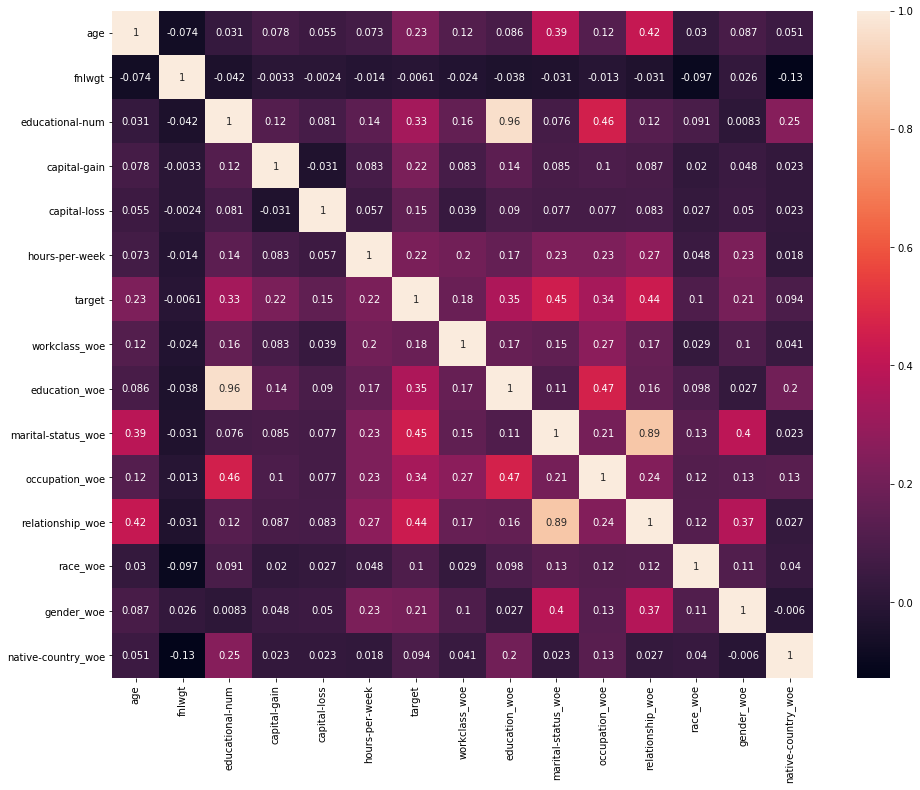

In [81]:
corr=data_train_sc.corr()

#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# There is a strong correlation between relationship and martial-status. Education and educational num
# Drop educational-num and relationship

/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

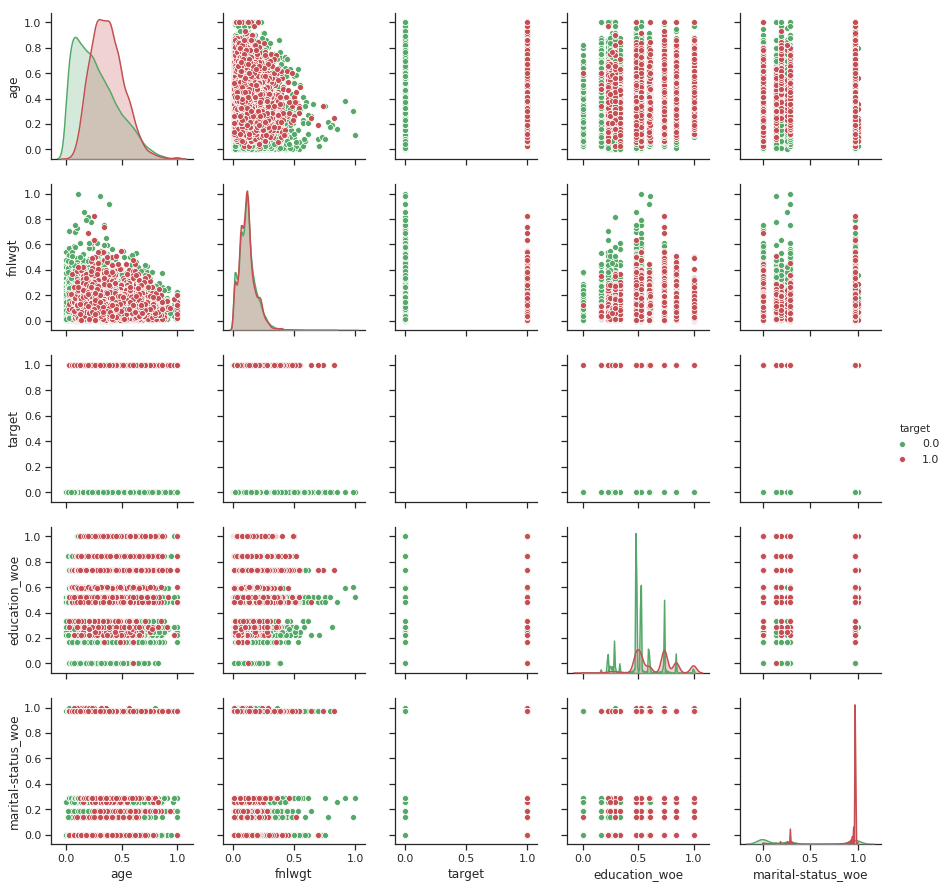

In [89]:
sns.set(style='ticks')
sns.pairplot(data_train_sc[['age', 'fnlwgt', \
    # 'capital-gain','workclass_woe', \
                            #'capital-loss', 'hours-per-week', \
                            'target', \
                            'education_woe', 'marital-status_woe',  \
                            
                            #'educational-num', 'relationship_woe',  \
                            
                            #'occupation_woe', 'race_woe', 'gender_woe','native-country_woe' \
                               ]]
                 , palette=('g', 'r'), hue='target')
plt.show

In [ ]:
#визуально понятно, что с некоторым успехом можно отделить уровни дохода, 
#например, проведя наклонную черту на графике fnwlwgt vs education_woe 

In [92]:
data_train_sc.drop(columns=['target'], inplace=True)
data_test_sc.drop(columns=['target'], inplace=True)

In [183]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(data_train_sc, y_train)
LogisticRegression(fit_intercept=True, n_jobs=None)
reg.coef_


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1.48939676e+00, 1.08044902e+00, 2.63769857e+00, 1.89248668e+01,
        2.67050556e+00, 2.16676176e+00, 3.25820998e-01, 1.27081094e+00,
        1.58077194e+00, 2.32383010e+00, 1.91536463e+00, 1.98671278e-01,
        1.52117238e-02, 1.14640455e+00]])

In [184]:
Accuracy=1-sum(abs(reg.predict(data_test_sc)-y_test))/len(y_test)

Precision=sum(reg.predict(data_test_sc)*y_test)/ \
    (sum(abs(reg.predict(data_test_sc)*y_test))+sum(reg.predict(data_test_sc)*(1-y_test)))

Recall=sum(reg.predict(data_test_sc)*y_test)/ \
    (sum(reg.predict(data_test_sc)*y_test)+sum((1-reg.predict(data_test_sc))*y_test))

F1=2*Precision*Recall/(Precision+Recall)



In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, reg.predict(data_test_sc))


array([[6870,  512],
       [1031, 1348]])

In [111]:
tp=sum(reg.predict(data_test_sc)*y_test)
tn=sum((1-reg.predict(data_test_sc))*(1-y_test))
fp=sum(reg.predict(data_test_sc)*(1-y_test))
fn=sum((1-reg.predict(data_test_sc))*y_test)
conv_d=[[tp, fp],
[fn, tn]]
y_distr_vs_pred=pd.DataFrame(conv_d, columns=['y_1','y_0'], index=['pred_1', 'pred_0'])
y_distr_vs_pred

,y_1,y_0
pred_1,1348,512
pred_0,1031,6870


In [ ]:
y_d=[[sum(y_test), len(y_test)-sum(y_test)],
[sum(reg.predict(data_test_sc)), len(y_test)-sum(reg.predict(data_test_sc))]]
y_distr_vs_pred=pd.DataFrame(y_d, columns=['1','0'], index=['y', 'pred'])
y_distr_vs_pred

In [99]:
print(Accuracy, Precision, Recall, F1)

0.8419219342280504 0.7247311827956989 0.5666246321984026 0.6359990563812219


In [185]:
all_columns=data_train_sc.columns
predictors=all_columns

In [186]:
col = ['model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'intercept'] \
    + ['coefx_%s' % i for i in all_columns]

#ind = ['model_pow_%d' % i for i in range(1, 16)]
ind = [i for i in range(17)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [187]:
coef_matrix_simple.iloc[0, 0 ]='logreg_%d' % (len(predictors)-1) +'_factors'
coef_matrix_simple.iloc[0, 1 ]=Accuracy
coef_matrix_simple.iloc[0, 2 ]=Precision
coef_matrix_simple.iloc[0, 3 ]=Recall
coef_matrix_simple.iloc[0, 4 ]=F1
coef_matrix_simple.iloc[0, 5 ]=reg.intercept_[0]
#for i in range(len(predictors)):
for i in range(len(all_columns)):
    #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
    coef_matrix_simple.iloc[0, col.index('coefx_'+all_columns[i])] = reg.coef_[0][i]
    #print(col.index('coefx_'+all_columns[i]), reg.coef_[0][i])

In [118]:
coef_matrix_simple.head(1)

,model,Accuracy,Precision,Recall,F1-Score,intercept,coefx_age,coefx_fnlwgt,coefx_educational-num,coefx_capital-gain,coefx_capital-loss,coefx_hours-per-week,coefx_workclass_woe,coefx_education_woe,coefx_marital-status_woe,coefx_occupation_woe,coefx_relationship_woe,coefx_race_woe,coefx_gender_woe,coefx_native-country_woe
0,logreg_13_factors,0.841922,0.724731,0.566625,0.635999,-10.7136,1.4894,1.08045,2.6377,18.9249,2.67051,2.16676,0.325821,1.27081,1.58077,2.32383,1.91536,0.198671,0.0152117,1.1464


In [147]:
predictors

['age',
 'fnlwgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_woe',
 'education_woe',
 'marital-status_woe',
 'occupation_woe',
 'relationship_woe',
 'race_woe',
 'gender_woe',
 'native-country_woe']

In [188]:
predictors=list(predictors)
#predictors.remove('educational-num')
predictors.remove('relationship_woe')


reg.fit(data_train_sc[predictors], y_train)
LogisticRegression(fit_intercept=True, n_jobs=None)
reg.coef_

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 1.53821727,  1.09776173,  2.58204626, 18.96420237,  2.7019416 ,
         2.2199274 ,  0.32465196,  1.40331113,  2.8352858 ,  2.35425422,
         0.20817159,  0.05758169,  1.18085372]])

In [149]:
list(predictors)

['age',
 'fnlwgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_woe',
 'education_woe',
 'marital-status_woe',
 'occupation_woe',
 'race_woe',
 'gender_woe',
 'native-country_woe']

In [189]:
def log_reg(X_train, Y_tr, X_test, Y_te, predics):
    reg = LogisticRegression()
    reg.fit(X_train[predics], Y_tr)
    LogisticRegression(fit_intercept=True, n_jobs=None)
    
    ret=[]
    Accuracy=1-sum(abs(reg.predict(X_test[predics])-Y_te))/len(Y_te)
    
    Precision=sum(reg.predict(X_test[predics])*Y_te)/ \
        (sum(abs(reg.predict(X_test[predics])*Y_te))+sum(reg.predict(X_test[predics])*(1-Y_te)))
    
    Recall=sum(reg.predict(X_test[predics])*Y_te)/ \
    (sum(reg.predict(X_test[predics])*Y_te)+sum((1-reg.predict(X_test[predics]))*Y_te))
    
    F1=2*Precision*Recall/(Precision+Recall)
    name='logreg_%d' % (len(predics)-1) +'_factors'
    ret.extend([name, Accuracy, Precision, Recall, F1, reg.intercept_[0]])
    #for i in range(len(predics)):
        #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
        #ret.extend(reg.coef_[0][i])
    ret.extend(reg.coef_[0])

    return ret

In [190]:
lr=log_reg(data_train_sc, y_train, data_test_sc, y_test, predictors)
lr[0:6]

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['logreg_12_factors',
 0.8408974490318615,
 0.7239696312364425,
 0.5611601513240857,
 0.632251953587497,
 -10.275860409961897]

In [191]:
coef_matrix_simple.iloc[1, 0:6 ]=lr[0:6]

In [192]:
for i in range(len(predictors)):
    #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
    coef_matrix_simple.iloc[1, col.index('coefx_'+predictors[i])] = reg.coef_[0][i]

In [193]:
coef_matrix_simple.head()

,model,Accuracy,Precision,Recall,F1-Score,intercept,coefx_age,coefx_fnlwgt,coefx_educational-num,coefx_capital-gain,coefx_capital-loss,coefx_hours-per-week,coefx_workclass_woe,coefx_education_woe,coefx_marital-status_woe,coefx_occupation_woe,coefx_relationship_woe,coefx_race_woe,coefx_gender_woe,coefx_native-country_woe
0,logreg_13_factors,0.841922,0.724731,0.566625,0.635999,-10.7136,1.4894,1.08045,2.6377,18.9249,2.67051,2.16676,0.325821,1.27081,1.58077,2.32383,1.91536,0.198671,0.0152117,1.1464
1,logreg_12_factors,0.840897,0.72397,0.56116,0.632252,-10.2759,1.53822,1.09776,2.58205,18.9642,2.70194,2.21993,0.324652,1.40331,2.83529,2.35425,NaN,0.208172,0.0575817,1.18085
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and rank each pixel
rfclass = RandomForestClassifier()      
rfe = RFE(estimator=rfclass, n_features_to_select=10, step=1)
rfe = rfe.fit(data_train_sc, y_train)
print('Chosen best 10 feature by rfe:', data_train_sc.columns[rfe.support_])

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-pa

Chosen best 10 feature by rfe: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'hours-per-week',
       'workclass_woe', 'education_woe', 'marital-status_woe',
       'occupation_woe', 'relationship_woe'],
      dtype='object')


In [196]:
#deleted relationship_woe, educational-num
predictors=['age', 'fnlwgt', 'capital-gain', 'hours-per-week',
       'workclass_woe', 'education_woe', 'marital-status_woe',
       'occupation_woe']

In [197]:
lr=log_reg(data_train_sc, y_train, data_test_sc, y_test, predictors)

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [198]:
coef_matrix_simple.iloc[2, 0:6 ]=lr[0:6]
for i in range(len(predictors)):
    #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
    coef_matrix_simple.iloc[2, col.index('coefx_'+predictors[i])] = reg.coef_[0][i]

In [199]:
coef_matrix_simple.head()

,model,Accuracy,Precision,Recall,F1-Score,intercept,coefx_age,coefx_fnlwgt,coefx_educational-num,coefx_capital-gain,coefx_capital-loss,coefx_hours-per-week,coefx_workclass_woe,coefx_education_woe,coefx_marital-status_woe,coefx_occupation_woe,coefx_relationship_woe,coefx_race_woe,coefx_gender_woe,coefx_native-country_woe
0,logreg_13_factors,0.841922,0.724731,0.566625,0.635999,-10.7136,1.4894,1.08045,2.6377,18.9249,2.67051,2.16676,0.325821,1.27081,1.58077,2.32383,1.91536,0.198671,0.0152117,1.1464
1,logreg_12_factors,0.840897,0.72397,0.56116,0.632252,-10.2759,1.53822,1.09776,2.58205,18.9642,2.70194,2.21993,0.324652,1.40331,2.83529,2.35425,NaN,0.208172,0.0575817,1.18085
2,logreg_7_factors,0.83639,0.716981,0.543085,0.618034,-9.10657,1.53822,1.09776,NaN,2.58205,NaN,18.9642,2.70194,2.21993,0.324652,1.40331,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
rfclass = RandomForestClassifier()      
rfe = RFE(estimator=rfclass, n_features_to_select=5, step=1)
rfe = rfe.fit(data_train_sc, y_train)
print('Chosen best 5 feature by rfe:', data_train_sc.columns[rfe.support_])

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-pa

Chosen best 5 feature by rfe: Index(['age', 'fnlwgt', 'capital-gain', 'education_woe', 'relationship_woe'], dtype='object')


In [201]:
predictors=['age', 'fnlwgt', 'capital-gain', 'education_woe', 'relationship_woe']

In [202]:
lr=log_reg(data_train_sc, y_train, data_test_sc, y_test, predictors)

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [203]:
coef_matrix_simple.iloc[3, 0:6 ]=lr[0:6]
for i in range(len(predictors)):
    #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
    coef_matrix_simple.iloc[3, col.index('coefx_'+predictors[i])] = reg.coef_[0][i]

In [204]:
coef_matrix_simple.head()

,model,Accuracy,Precision,Recall,F1-Score,intercept,coefx_age,coefx_fnlwgt,coefx_educational-num,coefx_capital-gain,coefx_capital-loss,coefx_hours-per-week,coefx_workclass_woe,coefx_education_woe,coefx_marital-status_woe,coefx_occupation_woe,coefx_relationship_woe,coefx_race_woe,coefx_gender_woe,coefx_native-country_woe
0,logreg_13_factors,0.841922,0.724731,0.566625,0.635999,-10.7136,1.4894,1.08045,2.6377,18.9249,2.67051,2.16676,0.325821,1.27081,1.58077,2.32383,1.91536,0.198671,0.0152117,1.1464
1,logreg_12_factors,0.840897,0.72397,0.56116,0.632252,-10.2759,1.53822,1.09776,2.58205,18.9642,2.70194,2.21993,0.324652,1.40331,2.83529,2.35425,NaN,0.208172,0.0575817,1.18085
2,logreg_7_factors,0.83639,0.716981,0.543085,0.618034,-9.10657,1.53822,1.09776,NaN,2.58205,NaN,18.9642,2.70194,2.21993,0.324652,1.40331,NaN,NaN,NaN,NaN
3,logreg_4_factors,0.830857,0.721411,0.498529,0.58961,-7.98324,1.53822,1.09776,NaN,2.58205,NaN,NaN,NaN,18.9642,NaN,NaN,2.70194,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#F1 is low. Fast attempts to choose right features were not successful. 
# Probably new features should be generated. We 've just shorten dimensions nmb